In [1]:
import pickle
with open('ROMS_26yr_COWed_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

# Remove Outliers
import numpy as np
TD_outlier_threshold = 150000 #m
e150 = {
    eddy: eddies[eddy].index[np.where(eddies[eddy]['Tilt Distance'] > TD_outlier_threshold)[0]].tolist()
    for eddy in eddies.keys()
    if any(eddies[eddy]['Tilt Distance'] > TD_outlier_threshold)
}
for eddy in e150:
    eddies[eddy] = eddies[eddy].drop(e150[eddy])

In [2]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

def add_days_to_date(days_to_add):
    new_dates = []
    for day_to_add in days_to_add:
        day_to_add = day_to_add + 1462
        input_date = '1990-01-01 00:00:00' # Beginning date of file 1462
        if not isinstance(input_date, datetime):
            input_date = datetime.strptime(input_date, '%Y-%m-%d %H:%M:%S')
        if isinstance(day_to_add, np.ndarray):
            day_to_add = day_to_add.item()
        new_date = input_date + timedelta(days=day_to_add)
        new_dates.append(new_date)
    return new_dates


def extract_numbers_from_list(strings):
    numbers = [int(''.join(filter(str.isdigit, s))) for s in strings if ''.join(filter(str.isdigit, s))]
    return numbers

def date_to_season(dates):
   
    month = dates.month
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

def month_to_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Summer'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Autumn'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Winter'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Spring'


distinct_colors_for_each_season = {
    'Summer': 'red',
    'Autumn': 'orange',
    'Winter': 'blue',
    'Spring': 'green'
}

## ACE & CE Windrose Plots

/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


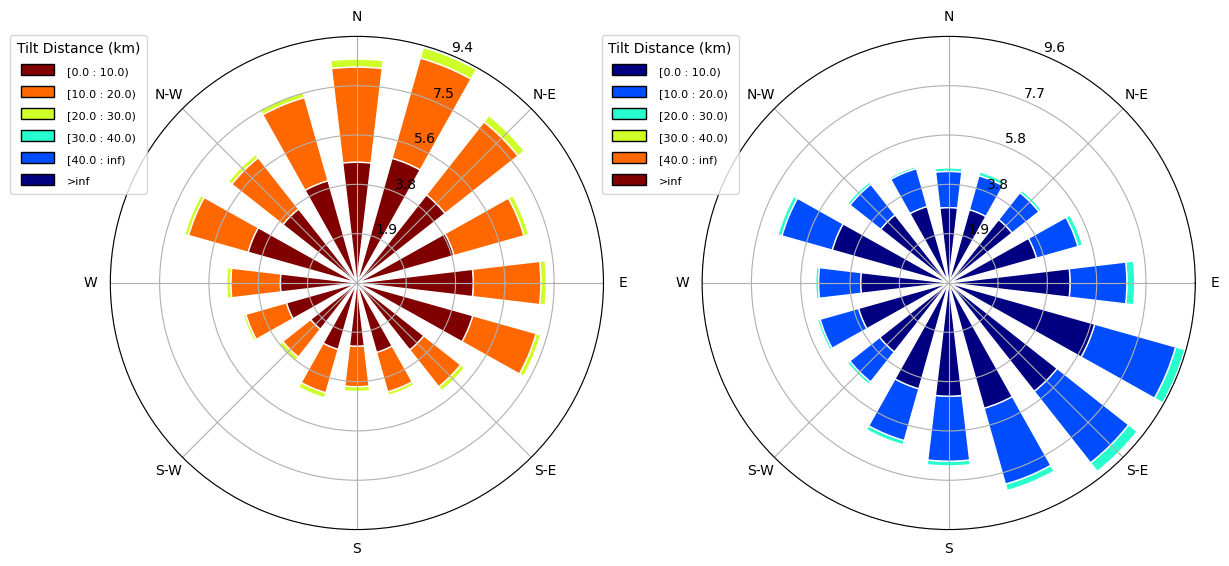

In [3]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

cmaps = [cm.jet_r, cm.jet]
cyclonicity = ['>', '<']

fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='windrose'), figsize=(14, 7))

for i in range(2):
    tdir = []
    tdis = []
    for eddy in eddies.keys():
        if len(eddies[eddy]) != 0:
            if any(eval(f"vort {cyclonicity[i]} 0") for vort in eddies[eddy]['Vort']):
                tdis.extend(eddies[eddy]['Tilt Distance'])
                tdir.extend(eddies[eddy]['Tilt Bearing'])
    ws = np.array(tdis)
    wd = np.array(tdir)
    
    # Define custom bins
    bins = [0, 10, 20, 30, 40, np.inf]
    
    # Create the Windrose plot
    ax = axs[i]
    ax.bar(wd, ws / 1000, normed=True, bins=bins, opening=0.6, edgecolor='white', cmap=cmaps[i])
    ax.set_legend(title='Tilt Distance (km)', fontsize='large', loc='upper left', bbox_to_anchor=(-0.2, 1))
    ax.grid(True)

plt.show()


## Load Data for either ACE or CE

In [6]:
tdir = []
tdis = []
elon = []
elat = []
evort = []
date = []
days = []

for eddy in eddies.keys():

    if len(eddies[eddy]) != 0:

        if any(eddies[eddy]['Vort'] < 0):
  
            tdis.extend(eddies[eddy]['Tilt Distance'])
            tdir.extend(eddies[eddy]['Tilt Bearing'])
            elon.extend(eddies[eddy]['Lon'])
            elat.extend(eddies[eddy]['Lat'])
            evort.extend(eddies[eddy]['Vort'])
    
            days_to_add = extract_numbers_from_list(list(eddies[eddy].index))
    
            date.extend(add_days_to_date(days_to_add)) 
    
            days.extend(days_to_add)

# Combine all lists into a list of tuples
combined = list(zip(tdis, tdir, elon, elat, evort, date, days))

# Sort the combined list by the first element of each tuple, which is tdis
combined_sorted = sorted(combined, key=lambda x: x[0])

# Unzip the sorted list back into individual lists
tdis_sorted, tdir_sorted, elon_sorted, elat_sorted, evort_sorted, date_sorted, days_sorted = zip(*combined_sorted)

# Convert back to lists if needed
tdis = list(tdis_sorted)
tdir = list(tdir_sorted)
elon = list(elon_sorted)
elat = list(elat_sorted)
evort = list(evort_sorted)
date = list(date_sorted)
days = list(days_sorted)

months = [d.strftime("%b") for d in date]
seasons = [month_to_season(m) for m in months]

/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


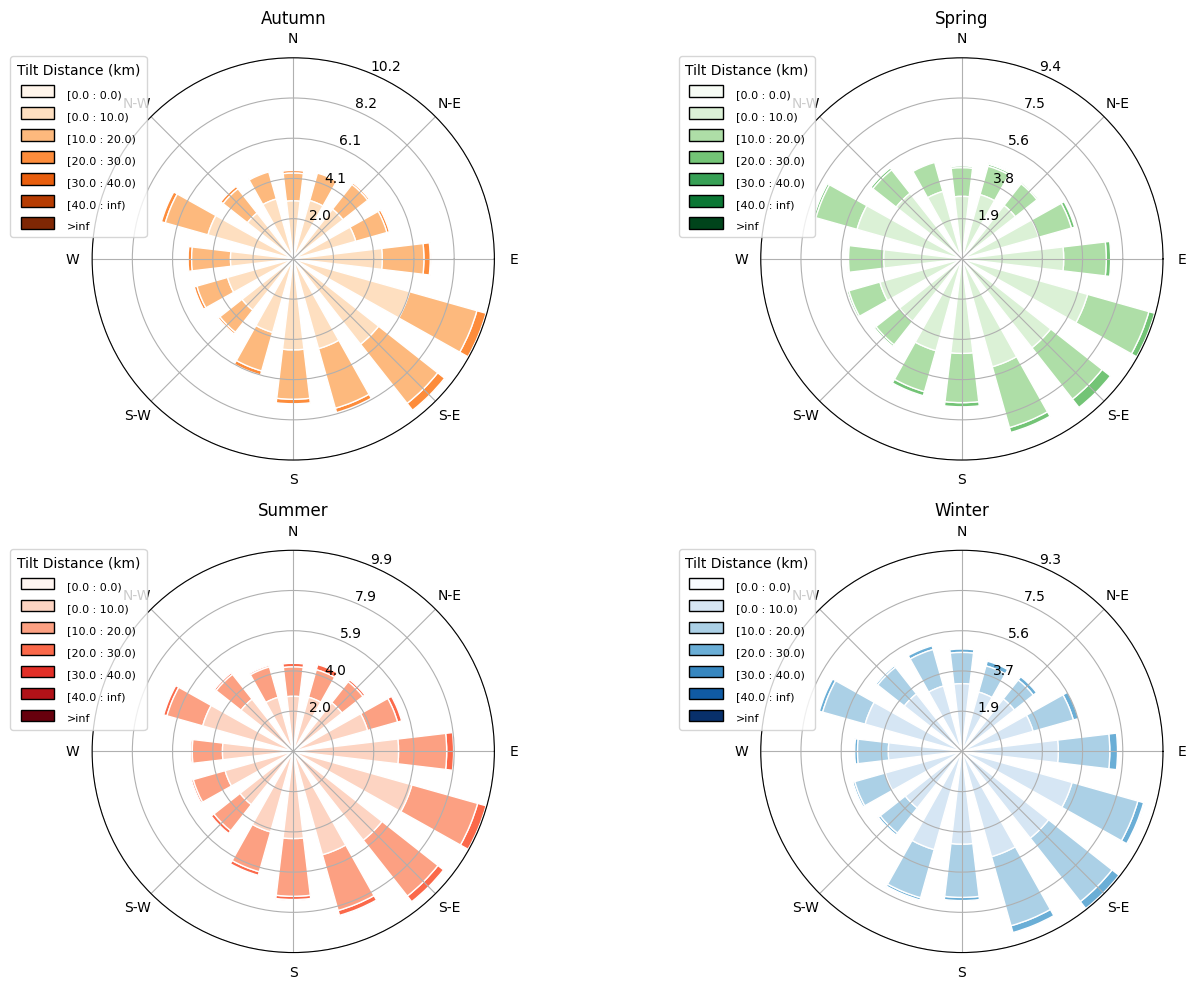

In [7]:
# Define custom bins
bins = [0,0, 10, 20, 30, 40, np.inf]

# Define colormaps for each subplot
colormaps = [cm.Oranges, cm.Greens, cm.Reds, cm.Blues]

# Determine unique seasons
unique_seasons = np.unique(seasons)

# Calculate number of subplots needed
num_plots = len(unique_seasons)

# Create a figure with subplots based on the number of unique seasons
fig, axes = plt.subplots(num_plots // 2, 2 if num_plots > 1 else 1, figsize=(14, 10), subplot_kw=dict(projection='windrose'))

# Iterate over each subplot and corresponding unique season
for i, season in enumerate(unique_seasons):
    if num_plots > 1:
        ax = axes[i//2, i%2]  # Calculate the subplot position
    else:
        ax = axes  # Use the only subplot
    
    # Filter data by season
    season_mask = (np.array(seasons) == season)
    ws = np.array(tdis)[season_mask]
    wd = np.array(tdir)[season_mask]
    
    # Create the Windrose plot with different colormap
    ax.bar(wd, ws/1000, normed=True, bins=bins, opening=0.6, edgecolor='white', cmap=colormaps[i % len(colormaps)])
    ax.set_title(f'{season}')
    ax.set_legend(title='Tilt Distance (km)', fontsize='large', loc='upper left', bbox_to_anchor=(-0.2, 1))
    ax.grid(True)

plt.tight_layout()
plt.show()


# Eddy Avenue

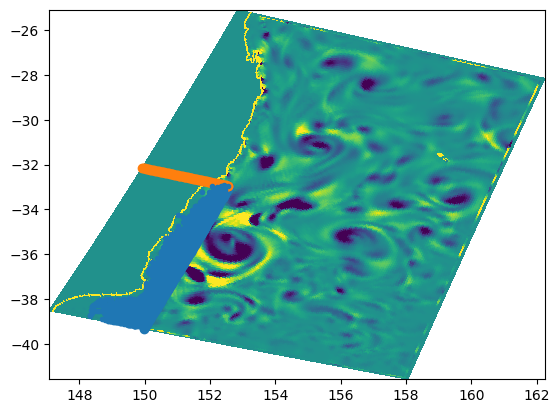

In [8]:
import netCDF4 as nc

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho']
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho']
lat_rho = np.transpose(lat_rho, axes=(1, 0))
h = dataset.variables['h']
h = np.transpose(h, (1, 0))


right_i = 100
up_j = 150

ow = np.load('/srv/scratch/z5297792/Climatology/ow_and_cur_speeds/ow_01461.npy')
plt.pcolor(lon_rho,lat_rho,ow[:,:,0,0],vmin=-1E-9,vmax=1E-9)
plt.scatter(lon_rho[right_i,:up_j],lat_rho[right_i,:up_j])
plt.scatter(lon_rho[:right_i,up_j],lat_rho[:right_i,up_j])
top_bdry_lon = lon_rho[:right_i,up_j]
top_bdry_lat = lat_rho[:right_i,up_j]
top_bdry = tuple(zip(top_bdry_lon,top_bdry_lat))
btm_bdry_lon = lon_rho[:right_i,0]
btm_bdry_lat = lat_rho[:right_i,0]
btm_bdry = tuple(zip(btm_bdry_lon,btm_bdry_lat))
right_bdry_lon = lon_rho[right_i,:up_j]
right_bdry_lat = lat_rho[right_i,:up_j]
right_bdry = tuple(zip(right_bdry_lon,right_bdry_lat))
left_bdry_lon = lon_rho[0,:up_j]
left_bdry_lat = lat_rho[0,:up_j]
left_bdry = tuple(zip(left_bdry_lon,left_bdry_lat))

from shapely.geometry import Point, Polygon


# Define the transects (example coordinates)
transect_1 = top_bdry
transect_2 = btm_bdry
transect_3 = right_bdry
transect_4 = left_bdry

# Combine the transects to form a polygon
polygon_points = transect_1 + transect_2 + transect_3 + transect_4
polygon = Polygon(polygon_points)

# Define the series of points to check
points = list(zip(elon,elat))

# Find points inside the polygon
enclosed_points = [point for point in points if polygon.contains(Point(point))]

enclosed_points_indices = [polygon.contains(Point(point)) for point in points]

ave_tdir = np.array(tdir)[enclosed_points_indices]
ave_tdis = np.array(tdis)[enclosed_points_indices]
ave_elon = np.array(elon)[enclosed_points_indices]
ave_elat = np.array(elat)[enclosed_points_indices]
ave_evort = np.array(evort)[enclosed_points_indices]
ave_date = np.array(date)[enclosed_points_indices]
ave_days = np.array(days)[enclosed_points_indices]
ave_months = np.array(months)[enclosed_points_indices]
ave_seasons = np.array(seasons)[enclosed_points_indices]

# Separate the x and y coordinates for plotting
x_coords = [point[0] for point in enclosed_points]
y_coords = [point[1] for point in enclosed_points]

# Plot the enclosed points
plt.plot(x_coords, y_coords,'.')

/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


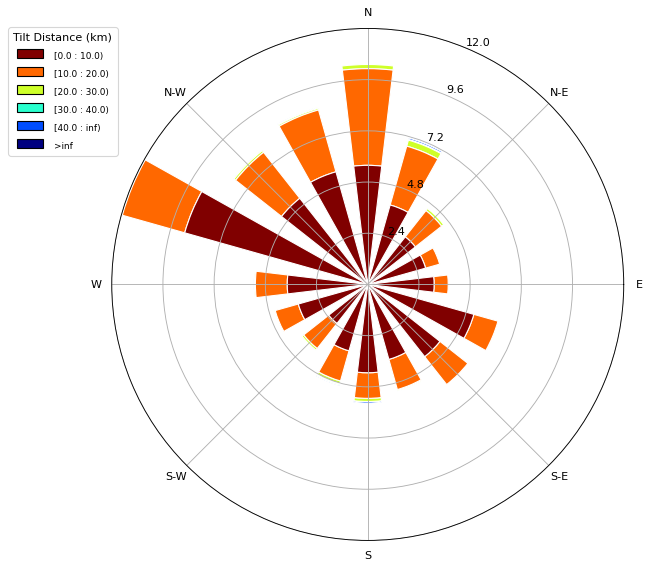

In [9]:

ws = np.array(ave_tdis)
wd = np.array(ave_tdir)

# Define custom bins
bins = [0, 10, 20, 30, 40, np.inf]


# Create the Windrose plot
ax = WindroseAxes.from_ax()
ax.bar(wd, ws/1000, normed=True, bins=bins, opening=0.6, edgecolor='white', cmap=cm.jet_r)
ax.set_legend(title='Tilt Distance (km)', fontsize='large', loc='upper left', bbox_to_anchor=(-0.2, 1))
ax.grid(True)
plt.show()